<a href="https://colab.research.google.com/github/HariCharan21903/Student-Performance-Analytics-using-Python-Excel/blob/main/Student_Performance_Analytics_using_Python_%26_Excel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import kagglehub
larsen0966_student_performance_data_set_path = kagglehub.dataset_download('larsen0966/student-performance-data-set')

print('Data source import complete.')


100%|██████████| 12.1k/12.1k [00:00<00:00, 13.2MB/s]

Extracting files...
Data source import complete.


In [2]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import math
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVR, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, mean_squared_error, r2_score
import itertools

In [5]:
data = pd.read_csv('/content/student-por.csv', sep=",")

In [6]:
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [7]:
data['school'].unique()

array(['GP', 'MS'], dtype=object)

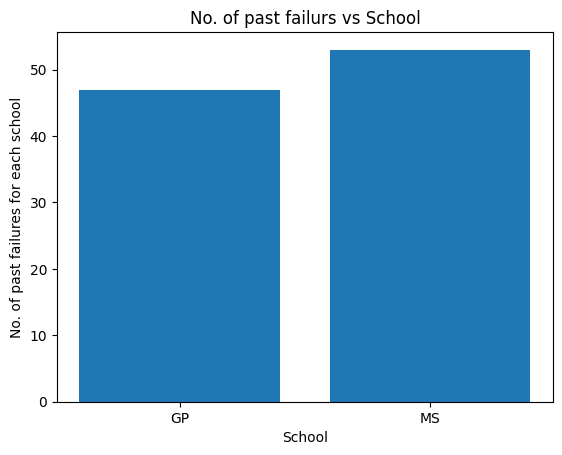

In [8]:
fig, ax = plt.subplots()

ax.bar(data['school'].unique(), [len(data[(data['school'] == "GP") & (data['failures']>0)].index), len(data[(data['school'] == "MS") & (data['failures']>0)].index)])

ax.set_ylabel('No. of past failures for each school')
ax.set_xlabel('School')
ax.set_title('No. of past failurs vs School')

plt.show()

In [9]:
data['sex'].unique()

array(['F', 'M'], dtype=object)

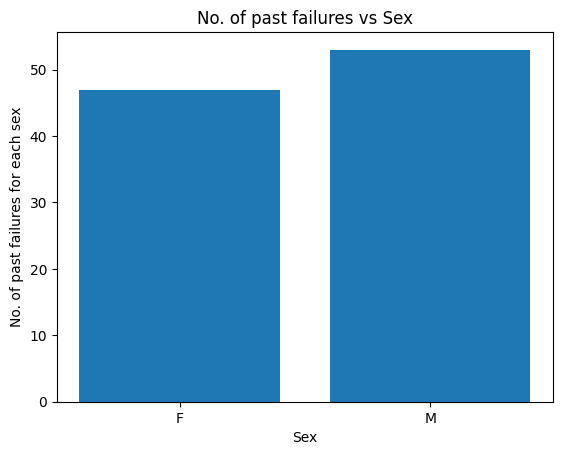

In [10]:
fig, ax = plt.subplots()

ax.bar(data['sex'].unique(), [len(data[(data['school'] == "GP") & (data['failures']>0)].index), len(data[(data['school'] == "MS") & (data['failures']>0)].index)])

ax.set_ylabel('No. of past failures for each sex')
ax.set_xlabel('Sex')
ax.set_title('No. of past failures vs Sex')

plt.show()

In [11]:
data['address'].unique()

array(['U', 'R'], dtype=object)

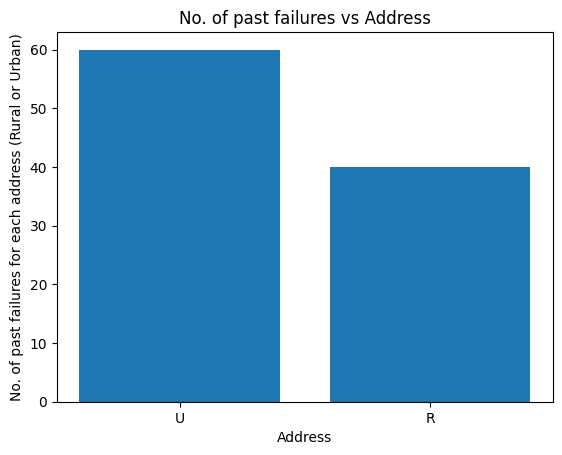

In [12]:
fig, ax = plt.subplots()

ax.bar(data['address'].unique(), [len(data[(data['address'] == "U") & (data['failures']>0)].index), len(data[(data['address'] == "R") & (data['failures']>0)].index)])

ax.set_ylabel('No. of past failures for each address (Rural or Urban)')
ax.set_xlabel('Address')
ax.set_title('No. of past failures vs Address')

plt.show()

In [13]:
data['famsize'].unique()

array(['GT3', 'LE3'], dtype=object)

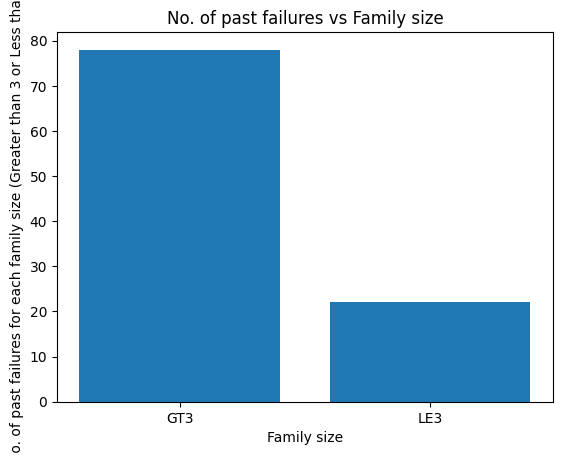

In [14]:
fig, ax = plt.subplots()

ax.bar(data['famsize'].unique(), [len(data[(data['famsize'] == "GT3") & (data['failures']>0)].index), len(data[(data['famsize'] == "LE3") & (data['failures']>0)].index)])

ax.set_ylabel('No. of past failures for each family size (Greater than 3 or Less than 3)')
ax.set_xlabel('Family size')
ax.set_title('No. of past failures vs Family size')

plt.show()

In [15]:
data['Pstatus'].unique()

array(['A', 'T'], dtype=object)

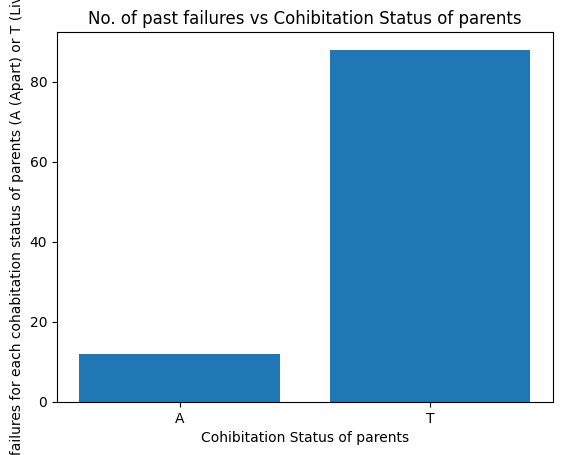

In [16]:
fig, ax = plt.subplots()

ax.bar(data['Pstatus'].unique(), [len(data[(data['Pstatus'] == "A") & (data['failures']>0)].index), len(data[(data['Pstatus'] == "T") & (data['failures']>0)].index)])

ax.set_ylabel('No. of past failures for each cohabitation status of parents (A (Apart) or T (Living together))')
ax.set_xlabel('Cohibitation Status of parents')
ax.set_title('No. of past failures vs Cohibitation Status of parents')

plt.show()

In [17]:
travel_times = [len(data[(data['traveltime'] == n) & (data['failures']>0)].index) for n in data['traveltime'].unique().tolist()]
study_times = [len(data[(data['studytime'] == n) & (data['failures']>0)].index) for n in data['studytime'].unique().tolist()]

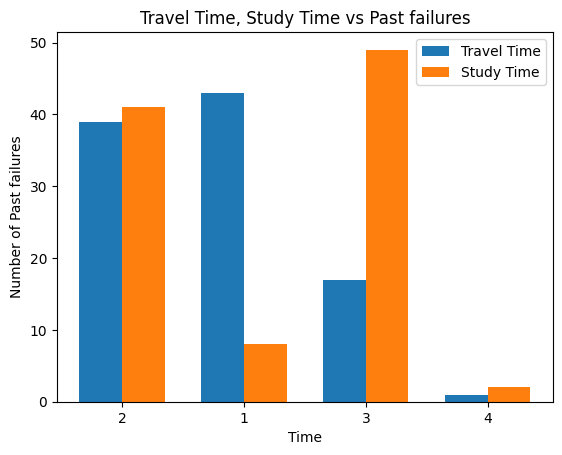

In [18]:
bar_width = 0.35

index = np.arange(max(len(data['traveltime'].unique()), len(data['studytime'].unique())))

fig, ax = plt.subplots()

ax.bar(index, travel_times, bar_width, label='Travel Time')
ax.bar(index + bar_width, study_times, bar_width, label='Study Time')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(data['traveltime'].unique())

ax.set_title('Travel Time, Study Time vs Past failures')
ax.set_xlabel('Time')
ax.set_ylabel('Number of Past failures')
ax.legend()

plt.show()

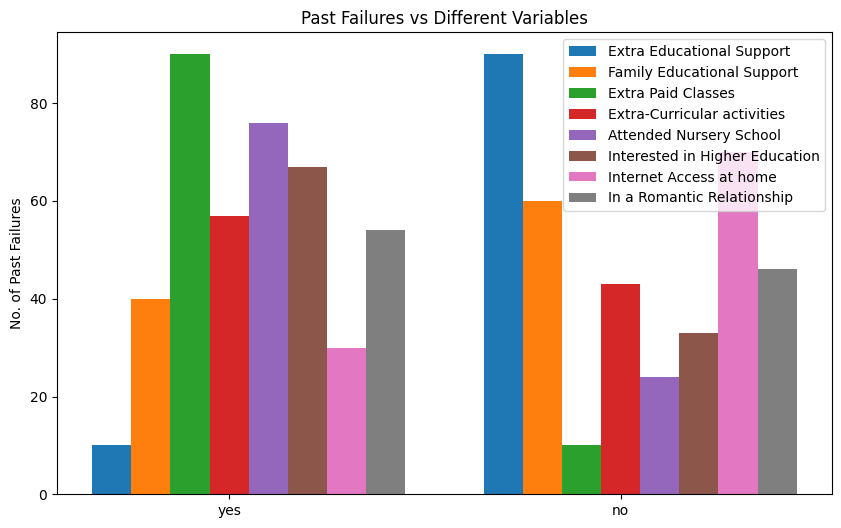

In [19]:
schools_up = [len(data[(data['schoolsup'] == i) & (data['failures'] > 0)].index) for i in data['schoolsup'].unique()]
famsup = [len(data[(data['famsup'] == i) & (data['failures'] > 0)].index) for i in data['famsup'].unique()]
paid = [len(data[(data['paid'] == i) & (data['failures'] > 0)].index) for i in data['paid'].unique()]
activities = [len(data[(data['activities'] == i) & (data['failures'] > 0)].index) for i in data['activities'].unique()]
nursery = [len(data[(data['nursery'] == i) & (data['failures'] > 0)].index) for i in data['nursery'].unique()]
higher = [len(data[(data['higher'] == i) & (data['failures'] > 0)].index) for i in data['higher'].unique()]
internet = [len(data[(data['internet'] == i) & (data['failures'] > 0)].index) for i in data['internet'].unique()]
romantic = [len(data[(data['romantic'] == i) & (data['failures'] > 0)].index) for i in data['romantic'].unique()]

labels = ['yes', 'no']

bar_width = 0.10

index = np.arange(len(labels))
fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(index, schools_up, bar_width, label='Extra Educational Support')
ax.bar(index + bar_width, famsup, bar_width, label='Family Educational Support')
ax.bar(index + 2 * bar_width, paid, bar_width, label='Extra Paid Classes')
ax.bar(index + 3 * bar_width, activities, bar_width, label='Extra-Curricular activities')
ax.bar(index + 4 * bar_width, nursery, bar_width, label='Attended Nursery School')
ax.bar(index + 5 * bar_width, higher, bar_width, label='Interested in Higher Education')
ax.bar(index + 6 * bar_width, internet, bar_width, label='Internet Access at home')
ax.bar(index + 7 * bar_width, romantic, bar_width, label='In a Romantic Relationship')

ax.set_xticks(index + 3*bar_width)
ax.set_xticklabels(labels)

ax.set_title('Past Failures vs Different Variables')
ax.set_ylabel('No. of Past Failures')
ax.legend()

plt.show()

In [20]:
medu_unique = set(data['Medu'].unique())
fedu_unique = set(data['Fedu'].unique())

# Create all combinations without duplicates
M_edu_F_edu_combinations = list(itertools.product(medu_unique, fedu_unique))

In [21]:
medu_fedu_dict = {}

for m,f in M_edu_F_edu_combinations:
    medu_fedu_dict[(m, f)] = 0
    count = 0
    for index, row in data.iterrows():
        if row['Medu'] == m and row['Fedu'] == f:
            count = count + row['failures']
    medu_fedu_dict[(m, f)] = count

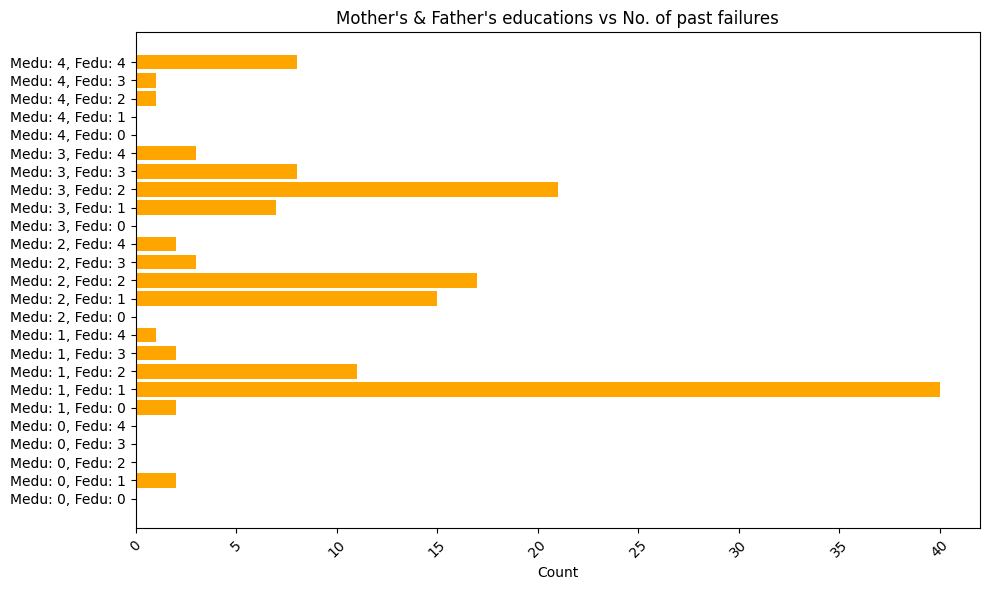

In [22]:
labels = [f'Medu: {key[0]}, Fedu: {key[1]}' for key in medu_fedu_dict.keys()]
values = list(medu_fedu_dict.values())

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
plt.barh(labels, values, color='orange')
plt.xlabel('Count')
plt.title("Mother's & Father's educations vs No. of past failures")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [23]:
mjob_unique = set(data['Mjob'].unique())
fjob_unique = set(data['Fjob'].unique())

# Create all combinations without duplicates
M_job_F_job_combinations = list(itertools.product(mjob_unique, fjob_unique))

In [24]:
mjob_fjob_dict = {}

for m,f in M_job_F_job_combinations:
    mjob_fjob_dict[(m, f)] = 0
    count = 0
    for index, row in data.iterrows():
        if row['Mjob'] == m and row['Fjob'] == f:
            count = count + row['failures']
    mjob_fjob_dict[(m, f)] = count

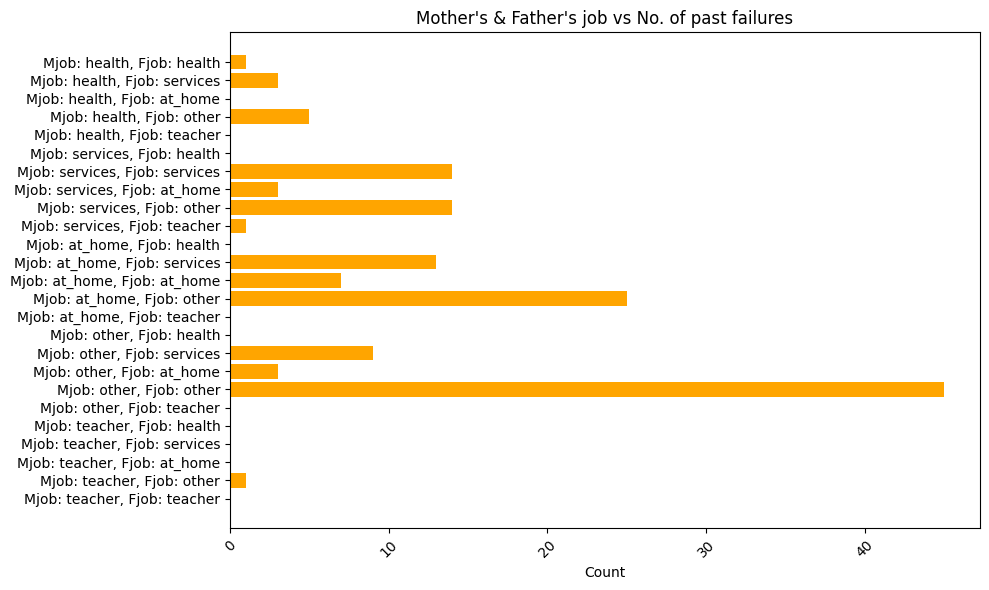

In [25]:
labels = [f'Mjob: {key[0]}, Fjob: {key[1]}' for key in mjob_fjob_dict.keys()]
values = list(mjob_fjob_dict.values())

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
plt.barh(labels, values, color='orange')
plt.xlabel('Count')
plt.title("Mother's & Father's job vs No. of past failures")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

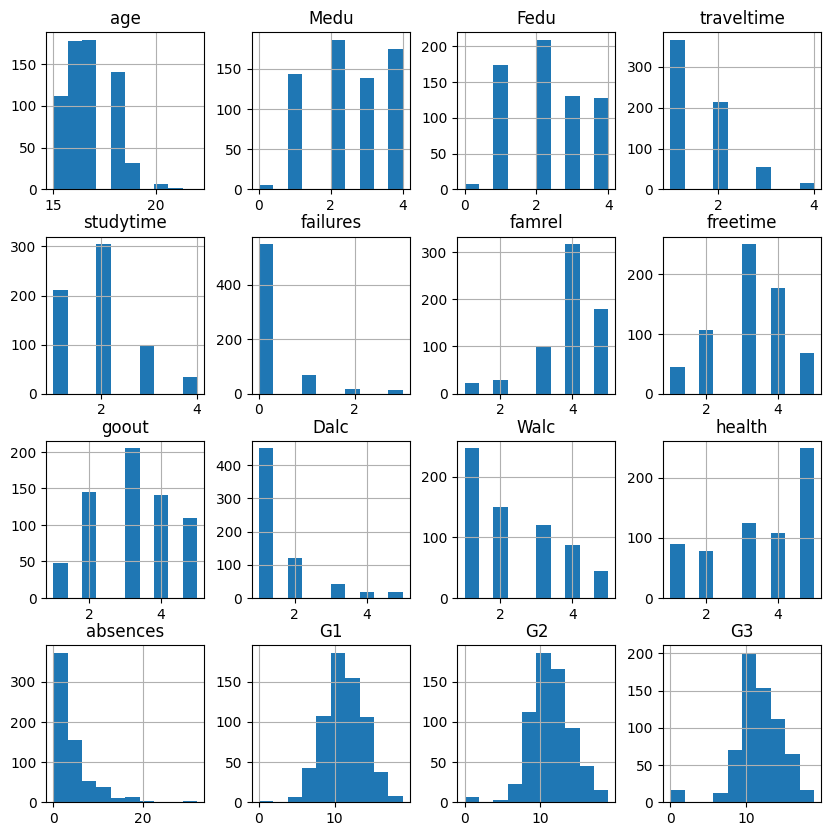

In [26]:
data.hist(figsize = (10,10))
plt.show()

## Data Pre-processing

In [27]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [28]:
data.isna().any()

,0
school,False
sex,False
age,False
address,False
famsize,False
Pstatus,False
Medu,False
Fedu,False
Mjob,False
Fjob,False


## Encoding categorical input variables

In [29]:
def encoding_categorical_variables(data):

    all_cols = data.columns.tolist()

    encoder = OrdinalEncoder(categories=[['at_home', 'teacher', 'health','services','other']])
    data[['Mjob']] = encoder.fit_transform(data[['Mjob']]).astype('int64')
    data[['Fjob']] = encoder.fit_transform(data[['Fjob']]).astype('int64')

    encoder = OrdinalEncoder(categories=[['other', 'mother', 'father']])
    data[['guardian']] = encoder.fit_transform(data[['guardian']]).astype('int64')

    encoder = OrdinalEncoder(categories=[['home', 'reputation', 'course', 'other']])
    data[['reason']] = encoder.fit_transform(data[['reason']]).astype('int64')

    encoder = OrdinalEncoder(categories=[['no', 'yes']])
    data[['schoolsup']] = encoder.fit_transform(data[['schoolsup']]).astype('int64')
    data[['famsup']] = encoder.fit_transform(data[['famsup']]).astype('int64')
    data[['paid']] = encoder.fit_transform(data[['paid']]).astype('int64')
    data[['activities']] = encoder.fit_transform(data[['activities']]).astype('int64')
    data[['nursery']] = encoder.fit_transform(data[['nursery']]).astype('int64')
    data[['higher']] = encoder.fit_transform(data[['higher']]).astype('int64')
    data[['internet']] = encoder.fit_transform(data[['internet']]).astype('int64')
    data[['romantic']] = encoder.fit_transform(data[['romantic']]).astype('int64')

    categorical_cols = ['school', 'sex', 'address', 'famsize', 'Pstatus']
    categorical_data = data[categorical_cols]

    encoder = OneHotEncoder(sparse_output=False)
    encoded_data = encoder.fit_transform(categorical_data).astype('int64')

    data_encoded = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))

    numeric_cols = [col for col in all_cols if col not in categorical_cols]

    data = pd.concat([data_encoded, data[numeric_cols]], axis=1)

    # Droping column 'age' as G3 scores are independent of 'age'
    data.drop('age', axis=1, inplace=True)

    return data

## Encoding target variable

In [30]:
def target_variable_encoding(data, data_test):

  # For binary classification tasks, according to the research paper, pass is considered if G3 >= 10, else fail
    for index, row in data.iterrows():
        if row['G3'] >= 10:
            data.at[index, 'G3'] = 1
        else:
            data.at[index, 'G3'] = 0

    for index, row in data_test.iterrows():
        if row['G3'] >= 10:
            data_test.at[index, 'G3'] = 1
        else:
            data_test.at[index, 'G3'] = 0

    return [data, data_test]

## Set B of prediction - Dropping G2 scores

In [31]:
def drop_G2(data, data_test):

    data_without_G2 = data.drop('G2', axis=1)
    data_test_without_G2 = data_test.drop('G2', axis=1)

    return [data_without_G2, data_test_without_G2]

## Set C of prediction - Dropping both G1, G2 scores

In [32]:
def drop_G1_G2(data, data_test):

    data_without_G1_G2 = data.drop(['G1', 'G2'], axis=1)
    data_test_without_G1_G2 = data_test.drop(['G1', 'G2'], axis=1)

    return [data_without_G1_G2, data_test_without_G1_G2]

## Models

In [33]:
# Random Forest model for classification

def rf_binary_classifier(X_train, y_train, X_test, y_test, inp_set, df_resultant_binary_clf):

    random_forest_clf = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0).fit(X_train, y_train.ravel())
    y_pred = random_forest_clf.predict(X_test)
    testing_accuracy = round(accuracy_score(y_test, y_pred), 2)
    f1 = round(f1_score(y_test, y_pred, average='macro'), 2)
    precision = round(precision_score(y_test, y_pred, average='macro'), 2)
    recall = round(recall_score(y_test, y_pred, average='macro'), 2)
    df_resultant_binary_clf.loc[len(df_resultant_binary_clf)] = [inp_set, 'Random Forest Classifier', testing_accuracy, f1, precision, recall]

    return df_resultant_binary_clf

In [34]:
# SVM model for classification

def svm_binary_classifier(X_train, y_train, X_test, y_test, inp_set, df_resultant_binary_clf):

    svm_classifier = SVC(kernel = 'linear', random_state = 0).fit(X_train, y_train.ravel())
    y_pred = svm_classifier.predict(X_test)
    testing_accuracy = round(accuracy_score(y_test, y_pred), 2)
    f1 = round(f1_score(y_test, y_pred, average='macro'), 2)
    precision = round(precision_score(y_test, y_pred, average='macro'), 2)
    recall = round(recall_score(y_test, y_pred, average='macro'), 2)
    df_resultant_binary_clf.loc[len(df_resultant_binary_clf)] = [inp_set, 'SVM', testing_accuracy, f1, precision, recall]

    return df_resultant_binary_clf

In [35]:
# Decision Tree model for classification

def dt_binary_classifier(X_train, y_train, X_test, y_test, inp_set, df_resultant_binary_clf):

    decision_tree_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0).fit(X_train, y_train)
    y_pred = decision_tree_classifier.predict(X_test)
    testing_accuracy = round(accuracy_score(y_test, y_pred), 2)
    f1 = round(f1_score(y_test, y_pred, average='macro'), 2)
    precision = round(precision_score(y_test, y_pred, average='macro'), 2)
    recall = round(recall_score(y_test, y_pred, average='macro'), 2)
    df_resultant_binary_clf.loc[len(df_resultant_binary_clf)] = [inp_set, 'Decision Tree Classifier', testing_accuracy, f1, precision, recall]

    return df_resultant_binary_clf

In [36]:
# Random Forest Regressor model to predict scores using regression

def rf_regressor(X_train, y_train, X_test, y_test, inp_set, df_resultant_regression):

    random_forest_reg = RandomForestRegressor(criterion='squared_error', random_state=0).fit(X_train, y_train.ravel())
    score = random_forest_reg.score(X_test, y_test)
    y_pred = random_forest_reg.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = math.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    df_resultant_regression.loc[len(df_resultant_regression)] = [inp_set, 'Random Forest Regressor', score, r2, mse, rmse]

    return df_resultant_regression

In [37]:
# Support Vector Regressor model to predict scores using regression

def sv_regressor(X_train, y_train, X_test, y_test, inp_set, df_resultant_regression):

    sv_reg = SVR(kernel='rbf').fit(X_train, y_train.reshape(-1))
    score = sv_reg.score(X_test, y_test)
    y_pred = sv_reg.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = math.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    df_resultant_regression.loc[len(df_resultant_regression)] = [inp_set, 'Support Vector Regressor', score, r2, mse, rmse]

    return df_resultant_regression

In [38]:
# Decision Tree Regressor model to predict scores using regression

def dt_regressor(X_train, y_train, X_test, y_test, inp_set, df_resultant_regression):

    decision_tree_reg = DecisionTreeRegressor(random_state=0).fit(X_train, y_train)
    score = decision_tree_reg.score(X_test, y_test)
    y_pred = decision_tree_reg.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = math.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    df_resultant_regression.loc[len(df_resultant_regression)] = [inp_set, 'Decision Tree Regressor', score, r2, mse, rmse]

    return df_resultant_regression

## Test-Train data split

In [39]:
def test_train_split(data):

    # Out of 649 samples, 120 random samples are considered for the test set, and remaining ones for training.
    test_data_indices = random.sample(range(650), 120)

    data_test = data.iloc[test_data_indices].copy()
    data.drop(index=test_data_indices, inplace=True)

    data_test.reset_index(drop=True, inplace=True)
    data.reset_index(drop=True, inplace=True)

    return [data, data_test]

## Feature Scaling

In [40]:
def feature_scaling(data, data_test):

  # All these columns are considered for feature scaling, to bring their value between 0 & 1
    feature_scaling_cols = ['Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures',
                          'famrel','freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2']

    scaler = MinMaxScaler()

    data[feature_scaling_cols] = scaler.fit_transform(data[feature_scaling_cols])

    data_test[feature_scaling_cols] = scaler.transform(data_test[feature_scaling_cols])

    return [data, data_test]

## Splitting data into train & test set arrays

In [41]:
def train_test_split_arrays(data, data_test):

    X_train = data.iloc[:, :-1].values

    # The target variable variable 'G3' is considered as 'y'
    y_train = data.iloc[:, -1:].values


    X_test = data_test.iloc[:, :-1].values
    y_test = data_test.iloc[:, -1:].values

    return [X_train, y_train, X_test, y_test]

## Data Pre-processing

In [42]:
data = encoding_categorical_variables(data)

In [44]:
def test_train_split(data):
    # Get the number of rows in the data DataFrame
    num_rows = data.shape[0]
    # Generate 120 random indices within the valid range of 0 to num_rows - 1
    test_data_indices = random.sample(range(num_rows), 120)

    data_test = data.iloc[test_data_indices].copy()
    data.drop(index=test_data_indices, inplace=True)

    data_test.reset_index(drop=True, inplace=True)
    data.reset_index(drop=True, inplace=True)

    return [data, data_test]

In [47]:
data

,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1,0,1,0,0,1,1,0,1,0,...,4,3,4,1,1,3,4,0,11,11
1,1,0,1,0,0,1,1,0,0,1,...,5,3,3,1,1,3,2,9,11,11
2,1,0,1,0,0,1,0,1,0,1,...,4,3,2,2,3,3,6,12,13,12
3,1,0,1,0,0,1,1,0,0,1,...,3,2,2,1,1,5,0,14,14,14
4,1,0,1,0,0,1,1,0,0,1,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,0,1,1,0,1,0,1,0,0,1,...,5,4,2,1,2,5,4,10,11,10
645,0,1,1,0,0,1,0,1,0,1,...,4,3,4,1,1,1,4,15,15,16
646,0,1,1,0,0,1,1,0,0,1,...,1,1,1,1,1,5,6,11,12,9
647,0,1,0,1,0,1,0,1,0,1,...,2,4,5,3,4,2,6,10,10,10


## Resultant df for regression predictions

In [48]:
df_resultant_regression = pd.DataFrame(columns=["Set", "Model", "Score", "R^2_Score", "MSE", "RMSE"])

## Regression

### Regression - Set A

In [52]:
# Reload the original data before pre-processing for Regression Set A
data = pd.read_csv('/content/student-por.csv', sep=",")

# ## Data Pre-processing
# %%
data = encoding_categorical_variables(data)

# %%
# Split the data into training and testing sets
# Reload the original data before splitting and feature scaling for Regression Set A
data = pd.read_csv('/content/student-por.csv', sep=",")
data = encoding_categorical_variables(data) # Re-encode the data after reloading
data, data_test = test_train_split(data)

# Feature Scaling - Applied after splitting
data, data_test = feature_scaling(data, data_test)


def test_train_split(data):
    # Get the number of rows in the data DataFrame
    num_rows = data.shape[0]
    # Generate 120 random indices within the valid range of 0 to num_rows - 1
    test_data_indices = random.sample(range(num_rows), 120)

    data_test = data.iloc[test_data_indices].copy()
    data.drop(index=test_data_indices, inplace=True)

    data_test.reset_index(drop=True, inplace=True)
    data.reset_index(drop=True, inplace=True)

    return [data, data_test]

# %%
data
# %% [markdown]
# ## Resultant df for regression predictions
# %%
df_resultant_regression = pd.DataFrame(columns=["Set", "Model", "Score", "R^2_Score", "MSE", "RMSE"])
# %% [markdown]
# ## Regression
# %% [markdown]
# ### Regression - Set A
# %%
# The data and data_test for Set A regression are already prepared above

X_train, y_train, X_test, y_test = train_test_split_arrays(data, data_test)

# %%
rf_regressor(X_train, y_train, X_test, y_test, 'A', df_resultant_regression)
sv_regressor(X_train, y_train, X_test, y_test, 'A', df_resultant_regression)
dt_regressor(X_train, y_train, X_test, y_test, 'A', df_resultant_regression)
# %% [markdown]
# ### Regression - Set B
# %%
# Reload and process data specifically for Set B
data = pd.read_csv('/content/student-por.csv', sep=",")
data = encoding_categorical_variables(data)
data, data_test = test_train_split(data)
data, data_test = feature_scaling(data, data_test) # Apply feature scaling

data_without_G2, data_test_without_G2 = drop_G2(data, data_test)

# %%
data_without_G2
# %%
data_test_without_G2
# %%
X_train, y_train, X_test, y_test = train_test_split_arrays(data_without_G2, data_test_without_G2)
# %%
rf_regressor(X_train, y_train, X_test, y_test, 'B', df_resultant_regression)
sv_regressor(X_train, y_train, X_test, y_test, 'B', df_resultant_regression)
dt_regressor(X_train, y_train, X_test, y_test, 'B', df_resultant_regression)
# %% [markdown]
# ### Regression - Set C
# %%
# Reload and process data specifically for Set C
data = pd.read_csv('/content/student-por.csv', sep=",")
data = encoding_categorical_variables(data)
data, data_test = test_train_split(data)
data, data_test = feature_scaling(data, data_test) # Apply feature scaling

data_without_G1_G2, data_test_without_G1_G2 = drop_G1_G2(data, data_test)

# %%
data_without_G1_G2
# %%
data_test_without_G1_G2
# %%
X_train, y_train, X_test, y_test = train_test_split_arrays(data_without_G1_G2, data_test_without_G1_G2)
# %%
rf_regressor(X_train, y_train, X_test, y_test, 'C', df_resultant_regression)
sv_regressor(X_train, y_train, X_test, y_test, 'C', df_resultant_regression)
dt_regressor(X_train, y_train, X_test, y_test, 'C', df_resultant_regression)
# %%
## For all 3 sets, RMSE is calculated for regression models.
## As mentioned in the research paper, predicting G3 becomes increasingly difficult as we keep dropping period grades.
# %% [markdown]
# ## Resultant df for binary classification predictions
# %%
df_resultant_binary_clf = pd.DataFrame(columns=["Set", "Model", "Testing Accuracy", "F1_Score", "Precision", "Recall"])
# %% [markdown]
# ## Binary Classification
# %%
# Reload and process data for Binary Classification Set A
data = pd.read_csv('/content/student-por.csv', sep=",")
data = encoding_categorical_variables(data)
data, data_test = test_train_split(data)
data, data_test = feature_scaling(data, data_test) # Apply feature scaling

data, data_test = target_variable_encoding(data, data_test)

# %% [markdown]
# ### Set A - Binary Classification
# %%
# The data and data_test for Set A binary classification are already prepared above

X_train, y_train, X_test, y_test = train_test_split_arrays(data, data_test)

# %%
rf_binary_classifier(X_train, y_train, X_test, y_test, 'A', df_resultant_binary_clf)
svm_binary_classifier(X_train, y_train, X_test, y_test, 'A', df_resultant_binary_clf)
dt_binary_classifier(X_train, y_train, X_test, y_test, 'A', df_resultant_binary_clf)
# %% [markdown]
# ### Set B - Binary Classification
# %%
# Reload and process data specifically for Set B binary classification
data = pd.read_csv('/content/student-por.csv', sep=",")
data = encoding_categorical_variables(data)
data, data_test = test_train_split(data)
data, data_test = feature_scaling(data, data_test) # Apply feature scaling

data, data_test = target_variable_encoding(data, data_test)

data_without_G2, data_test_without_G2 = drop_G2(data, data_test)

# %%
data_without_G2
# %%
data_test_without_G2
# %%
X_train, y_train, X_test, y_test = train_test_split_arrays(data_without_G2, data_test_without_G2)
# %%
rf_binary_classifier(X_train, y_train, X_test, y_test, 'B', df_resultant_binary_clf)
svm_binary_classifier(X_train, y_train, X_test, y_test, 'B', df_resultant_binary_clf)
dt_binary_classifier(X_train, y_train, X_test, y_test, 'B', df_resultant_binary_clf)
# %% [markdown]
# ### Set C - Binary Classification
# %%
# Reload and process data specifically for Set C binary classification
data = pd.read_csv('/content/student-por.csv', sep=",")
data = encoding_categorical_variables(data)
data, data_test = test_train_split(data)
data, data_test = feature_scaling(data, data_test) # Apply feature scaling

data, data_test = target_variable_encoding(data, data_test)

data_without_G1_G2, data_test_without_G1_G2 = drop_G1_G2(data, data_test)

# %%
data_without_G1_G2
# %%
data_test_without_G1_G2
# %%
X_train, y_train, X_test, y_test = train_test_split_arrays(data_without_G1_G2, data_test_without_G1_G2)
# %%
rf_binary_classifier(X_train, y_train, X_test, y_test, 'C', df_resultant_binary_clf)
svm_binary_classifier(X_train, y_train, X_test, y_test, 'C', df_resultant_binary_clf)
dt_binary_classifier(X_train, y_train, X_test, y_test, 'C', df_resultant_binary_clf)
# %%
## For all 3 sets, testing accuracy is calculated for classification models.
## As mentioned in the research paper, predicting G3 becomes increasingly difficult as we keep dropping period grades.

,Set,Model,Testing Accuracy,F1_Score,Precision,Recall
0,A,Random Forest Classifier,0.94,0.89,0.90,0.89
1,A,SVM,0.88,0.76,0.78,0.74
2,A,Decision Tree Classifier,0.90,0.82,0.82,0.82
3,B,Random Forest Classifier,0.87,0.70,0.74,0.67
4,B,SVM,0.84,0.65,0.67,0.63
5,B,Decision Tree Classifier,0.83,0.71,0.69,0.74
6,C,Random Forest Classifier,0.89,0.54,0.70,0.53
7,C,SVM,0.89,0.63,0.71,0.60
8,C,Decision Tree Classifier,0.82,0.62,0.61,0.66


In [53]:

df_resultant_binary_clf


,Set,Model,Testing Accuracy,F1_Score,Precision,Recall
0,A,Random Forest Classifier,0.94,0.89,0.90,0.89
1,A,SVM,0.88,0.76,0.78,0.74
2,A,Decision Tree Classifier,0.90,0.82,0.82,0.82
3,B,Random Forest Classifier,0.87,0.70,0.74,0.67
4,B,SVM,0.84,0.65,0.67,0.63
5,B,Decision Tree Classifier,0.83,0.71,0.69,0.74
6,C,Random Forest Classifier,0.89,0.54,0.70,0.53
7,C,SVM,0.89,0.63,0.71,0.60
8,C,Decision Tree Classifier,0.82,0.62,0.61,0.66


In [54]:
rf_regressor(X_train, y_train, X_test, y_test, 'A', df_resultant_regression)
sv_regressor(X_train, y_train, X_test, y_test, 'A', df_resultant_regression)
dt_regressor(X_train, y_train, X_test, y_test, 'A', df_resultant_regression)

,Set,Model,Score,R^2_Score,MSE,RMSE
0,A,Random Forest Regressor,0.895032,0.895032,1.046986,1.023223
1,A,Support Vector Regressor,0.558003,0.558003,4.408642,2.099677
2,A,Decision Tree Regressor,0.656620,0.656620,3.425000,1.850676
3,B,Random Forest Regressor,0.566623,0.566623,4.333500,2.081706
4,B,Support Vector Regressor,0.389385,0.389385,6.105766,2.470985
5,B,Decision Tree Regressor,0.254120,0.254120,7.458333,2.730995
6,C,Random Forest Regressor,0.424873,0.424873,5.779392,2.404037
7,C,Support Vector Regressor,0.351554,0.351554,6.516159,2.552677
8,C,Decision Tree Regressor,-0.172601,-0.172601,11.783333,3.432686
9,A,Random Forest Regressor,0.021124,0.021124,0.094557,0.307501


### Regression - Set B

In [55]:
data_without_G2, data_test_without_G2 = drop_G2(data, data_test)

In [56]:
data_without_G2

,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G3
0,1,0,1,0,0,1,1,0,0,1,...,0,1.00,0.50,0.50,0.00,0.00,0.50,0.0625,0.333333,1
1,1,0,1,0,0,1,1,0,0,1,...,1,0.50,0.25,0.25,0.00,0.00,1.00,0.0000,0.666667,1
2,1,0,1,0,0,1,1,0,0,1,...,0,0.75,0.50,0.25,0.00,0.25,1.00,0.0000,0.466667,1
3,1,0,0,1,0,1,0,1,0,1,...,0,1.00,0.75,0.25,0.00,0.25,1.00,0.1875,0.533333,1
4,1,0,0,1,0,1,0,1,0,1,...,0,0.75,0.75,0.75,0.00,0.00,0.50,0.0000,0.600000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524,0,1,1,0,1,0,1,0,0,1,...,1,0.75,0.75,0.50,0.25,0.25,1.00,0.1250,0.200000,1
525,0,1,1,0,1,0,1,0,0,1,...,0,1.00,0.75,0.25,0.00,0.25,1.00,0.1250,0.400000,1
526,0,1,1,0,0,1,1,0,0,1,...,0,0.00,0.00,0.00,0.00,0.00,1.00,0.1875,0.466667,0
527,0,1,0,1,0,1,0,1,0,1,...,0,0.25,0.75,1.00,0.50,0.75,0.25,0.1875,0.400000,1


In [57]:
data_test_without_G2

,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G3
0,0,1,0,1,1,0,1,0,0,1,...,0,0.75,0.50,0.25,0.00,0.50,1.0,0.0000,0.066667,0
1,0,1,1,0,0,1,0,1,0,1,...,0,1.00,1.00,0.00,0.00,0.00,0.5,0.0000,0.200000,1
2,1,0,0,1,0,1,1,0,0,1,...,0,0.75,0.25,0.75,0.25,0.75,0.0,0.0000,0.600000,1
3,0,1,1,0,1,0,0,1,0,1,...,1,1.00,0.75,0.50,0.00,0.00,1.0,0.0625,0.400000,0
4,0,1,0,1,1,0,0,1,0,1,...,0,1.00,1.00,1.00,1.00,1.00,0.5,0.1250,0.400000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,0,1,0,1,0,1,0,1,1,0,...,1,0.75,0.00,0.25,0.00,0.00,1.0,0.1250,0.466667,1
116,1,0,1,0,0,1,1,0,0,1,...,1,0.50,0.75,0.75,0.00,0.25,1.0,0.0625,0.400000,1
117,1,0,1,0,1,0,0,1,0,1,...,0,0.75,0.75,0.25,0.25,0.50,0.5,0.1875,0.733333,1
118,0,1,1,0,0,1,0,1,1,0,...,0,0.00,0.75,0.75,0.00,0.00,1.0,0.0000,0.133333,0


In [61]:
X_train, y_train, X_test, y_test = train_test_split_arrays(data_without_G2, data_test_without_G2)

In [62]:
rf_regressor(X_train, y_train, X_test, y_test, 'B', df_resultant_regression)
sv_regressor(X_train, y_train, X_test, y_test, 'B', df_resultant_regression)
dt_regressor(X_train, y_train, X_test, y_test, 'B', df_resultant_regression)

,Set,Model,Score,R^2_Score,MSE,RMSE
0,A,Random Forest Regressor,0.895032,0.895032,1.046986,1.023223
1,A,Support Vector Regressor,0.558003,0.558003,4.408642,2.099677
2,A,Decision Tree Regressor,0.656620,0.656620,3.425000,1.850676
3,B,Random Forest Regressor,0.566623,0.566623,4.333500,2.081706
4,B,Support Vector Regressor,0.389385,0.389385,6.105766,2.470985
5,B,Decision Tree Regressor,0.254120,0.254120,7.458333,2.730995
6,C,Random Forest Regressor,0.424873,0.424873,5.779392,2.404037
7,C,Support Vector Regressor,0.351554,0.351554,6.516159,2.552677
8,C,Decision Tree Regressor,-0.172601,-0.172601,11.783333,3.432686
9,A,Random Forest Regressor,0.021124,0.021124,0.094557,0.307501


### Regression - Set C

In [63]:
data_without_G1_G2, data_test_without_G1_G2 = drop_G1_G2(data, data_test)

In [64]:
data_without_G1_G2

,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
0,1,0,1,0,0,1,1,0,1,0,...,0,0,0.75,0.50,0.75,0.00,0.00,0.5,0.133333,11
1,1,0,1,0,0,1,1,0,0,1,...,1,0,1.00,0.50,0.50,0.00,0.00,0.5,0.066667,11
2,1,0,1,0,0,1,0,1,0,1,...,1,0,0.75,0.50,0.25,0.25,0.50,0.5,0.200000,12
3,1,0,0,1,0,1,0,1,0,1,...,1,0,1.00,0.75,0.25,0.00,0.25,1.0,0.200000,13
4,1,0,1,0,0,1,1,0,1,0,...,0,0,0.75,0.00,0.75,0.00,0.00,0.0,0.066667,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524,0,1,1,0,0,1,1,0,0,1,...,1,0,1.00,1.00,0.75,0.00,0.00,0.0,0.000000,11
525,0,1,1,0,1,0,1,0,0,1,...,1,0,1.00,0.75,0.25,0.00,0.25,1.0,0.133333,10
526,0,1,1,0,0,1,0,1,0,1,...,1,0,0.75,0.50,0.75,0.00,0.00,0.0,0.133333,16
527,0,1,1,0,0,1,1,0,0,1,...,0,0,0.00,0.00,0.00,0.00,0.00,1.0,0.200000,9


In [65]:
data_test_without_G1_G2

,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
0,0,1,1,0,0,1,0,1,0,1,...,1,0,1.00,0.50,0.25,0.00,0.00,0.75,0.000000,18
1,1,0,1,0,0,1,0,1,0,1,...,1,0,0.75,0.75,1.00,0.00,0.00,0.75,0.000000,15
2,0,1,1,0,1,0,0,1,0,1,...,1,0,1.00,0.75,0.50,0.00,0.25,0.75,0.000000,10
3,1,0,1,0,1,0,0,1,0,1,...,1,0,0.75,0.75,0.25,0.25,0.50,0.50,0.200000,15
4,0,1,0,1,1,0,1,0,0,1,...,1,1,1.00,0.75,0.50,0.25,0.75,0.75,0.200000,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,1,0,1,0,0,1,0,1,1,0,...,1,1,1.00,0.50,0.75,0.00,0.00,0.75,0.066667,9
116,1,0,1,0,1,0,1,0,0,1,...,0,0,1.00,0.00,0.50,0.00,0.00,0.50,0.000000,13
117,1,0,0,1,0,1,1,0,0,1,...,1,0,1.00,0.75,0.50,0.00,0.25,0.50,0.000000,13
118,1,0,1,0,0,1,1,0,0,1,...,1,0,0.75,0.50,0.50,0.00,0.25,1.00,0.000000,10


In [66]:
# Reload and process data specifically for Set C
data = pd.read_csv('/content/student-por.csv', sep=",")
data = encoding_categorical_variables(data)
data, data_test = test_train_split(data)
data, data_test = feature_scaling(data, data_test) # Apply feature scaling

# Ensure drop_G1_G2 is called right before using the variables
data_without_G1_G2, data_test_without_G1_G2 = drop_G1_G2(data, data_test)

# %%
# data_without_G1_G2 # This line was likely in a separate cell, which is fine for inspection
# %%
# data_test_without_G1_G2 # This line was likely in a separate cell, which is fine for inspection
# %%
X_train, y_train, X_test, y_test = train_test_split_arrays(data_without_G1_G2, data_test_without_G1_G2)

In [67]:
rf_regressor(X_train, y_train, X_test, y_test, 'C', df_resultant_regression)
sv_regressor(X_train, y_train, X_test, y_test, 'C', df_resultant_regression)
dt_regressor(X_train, y_train, X_test, y_test, 'C', df_resultant_regression)

,Set,Model,Score,R^2_Score,MSE,RMSE
0,A,Random Forest Regressor,0.895032,0.895032,1.046986,1.023223
1,A,Support Vector Regressor,0.558003,0.558003,4.408642,2.099677
2,A,Decision Tree Regressor,0.656620,0.656620,3.425000,1.850676
3,B,Random Forest Regressor,0.566623,0.566623,4.333500,2.081706
4,B,Support Vector Regressor,0.389385,0.389385,6.105766,2.470985
5,B,Decision Tree Regressor,0.254120,0.254120,7.458333,2.730995
6,C,Random Forest Regressor,0.424873,0.424873,5.779392,2.404037
7,C,Support Vector Regressor,0.351554,0.351554,6.516159,2.552677
8,C,Decision Tree Regressor,-0.172601,-0.172601,11.783333,3.432686
9,A,Random Forest Regressor,0.021124,0.021124,0.094557,0.307501


In [68]:
## For all 3 sets, RMSE is calculated for regression models.
## As mentioned in the research paper, predicting G3 becomes increasingly difficult as we keep dropping period grades.

## Resultant df for binary classification predictions

In [69]:
df_resultant_binary_clf = pd.DataFrame(columns=["Set", "Model", "Testing Accuracy", "F1_Score", "Precision", "Recall"])

## Binary Classification

In [70]:
data, data_test = target_variable_encoding(data, data_test)

### Set A - Binary Classification

In [71]:
X_train, y_train, X_test, y_test = train_test_split_arrays(data, data_test)

In [72]:
rf_binary_classifier(X_train, y_train, X_test, y_test, 'A', df_resultant_binary_clf)
svm_binary_classifier(X_train, y_train, X_test, y_test, 'A', df_resultant_binary_clf)
dt_binary_classifier(X_train, y_train, X_test, y_test, 'A', df_resultant_binary_clf)

,Set,Model,Testing Accuracy,F1_Score,Precision,Recall
0,A,Random Forest Classifier,0.95,0.89,0.94,0.86
1,A,SVM,0.92,0.84,0.84,0.84
2,A,Decision Tree Classifier,0.90,0.82,0.80,0.85


### Set B - Binary Classification

In [73]:
data_without_G2, data_test_without_G2 = drop_G2(data, data_test)

In [74]:
data_without_G2

,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G3
0,1,0,1,0,0,1,1,0,1,0,...,0,0.75,0.50,0.75,0.00,0.00,0.50,0.133333,0.000000,1
1,1,0,1,0,0,1,1,0,0,1,...,0,1.00,0.50,0.50,0.00,0.00,0.50,0.066667,0.473684,1
2,1,0,1,0,0,1,0,1,0,1,...,0,0.75,0.50,0.25,0.25,0.50,0.50,0.200000,0.631579,1
3,1,0,1,0,0,1,1,0,0,1,...,1,0.50,0.25,0.25,0.00,0.00,1.00,0.000000,0.736842,1
4,1,0,1,0,0,1,1,0,0,1,...,0,0.75,0.50,0.25,0.00,0.25,1.00,0.000000,0.578947,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524,0,1,1,0,1,0,1,0,0,1,...,0,1.00,0.75,0.25,0.00,0.25,1.00,0.133333,0.526316,1
525,0,1,1,0,0,1,0,1,0,1,...,0,0.75,0.50,0.75,0.00,0.00,0.00,0.133333,0.789474,1
526,0,1,1,0,0,1,1,0,0,1,...,0,0.00,0.00,0.00,0.00,0.00,1.00,0.200000,0.578947,0
527,0,1,0,1,0,1,0,1,0,1,...,0,0.25,0.75,1.00,0.50,0.75,0.25,0.200000,0.526316,1


In [75]:
data_test_without_G2

,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G3
0,0,1,0,1,0,1,1,0,0,1,...,0,0.75,0.50,0.50,0.00,0.25,0.75,0.033333,0.684211,1
1,0,1,1,0,1,0,1,0,0,1,...,0,0.50,0.75,0.50,0.00,0.00,0.00,0.000000,0.368421,0
2,0,1,0,1,1,0,1,0,0,1,...,0,1.00,0.75,0.50,0.75,0.50,0.50,0.000000,0.368421,0
3,0,1,1,0,1,0,1,0,0,1,...,1,1.00,1.00,1.00,0.00,0.00,0.50,0.000000,0.421053,0
4,0,1,1,0,1,0,1,0,0,1,...,0,0.75,0.50,0.25,0.00,0.00,0.00,0.000000,0.684211,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,1,0,1,0,0,1,1,0,0,1,...,1,0.00,0.50,0.25,0.00,0.00,0.00,0.133333,0.736842,1
116,1,0,0,1,0,1,1,0,0,1,...,0,0.50,0.25,1.00,0.25,1.00,1.00,0.133333,0.368421,0
117,1,0,0,1,0,1,0,1,0,1,...,0,0.75,0.75,0.75,0.00,0.00,0.50,0.000000,0.684211,1
118,1,0,1,0,1,0,1,0,0,1,...,0,0.75,0.50,0.25,0.00,0.00,1.00,0.066667,0.578947,1


In [76]:
X_train, y_train, X_test, y_test = train_test_split_arrays(data_without_G2, data_test_without_G2)

In [77]:
rf_binary_classifier(X_train, y_train, X_test, y_test, 'B', df_resultant_binary_clf)
svm_binary_classifier(X_train, y_train, X_test, y_test, 'B', df_resultant_binary_clf)
dt_binary_classifier(X_train, y_train, X_test, y_test, 'B', df_resultant_binary_clf)

,Set,Model,Testing Accuracy,F1_Score,Precision,Recall
0,A,Random Forest Classifier,0.95,0.89,0.94,0.86
1,A,SVM,0.92,0.84,0.84,0.84
2,A,Decision Tree Classifier,0.90,0.82,0.80,0.85
3,B,Random Forest Classifier,0.92,0.81,0.88,0.77
4,B,SVM,0.93,0.83,0.89,0.80
5,B,Decision Tree Classifier,0.89,0.79,0.79,0.80


### Set C - Binary Classification

In [78]:
data_without_G1_G2, data_test_without_G1_G2 = drop_G1_G2(data, data_test)

In [79]:
data_without_G1_G2

,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
0,1,0,1,0,0,1,1,0,1,0,...,0,0,0.75,0.50,0.75,0.00,0.00,0.50,0.133333,1
1,1,0,1,0,0,1,1,0,0,1,...,1,0,1.00,0.50,0.50,0.00,0.00,0.50,0.066667,1
2,1,0,1,0,0,1,0,1,0,1,...,1,0,0.75,0.50,0.25,0.25,0.50,0.50,0.200000,1
3,1,0,1,0,0,1,1,0,0,1,...,1,1,0.50,0.25,0.25,0.00,0.00,1.00,0.000000,1
4,1,0,1,0,0,1,1,0,0,1,...,0,0,0.75,0.50,0.25,0.00,0.25,1.00,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524,0,1,1,0,1,0,1,0,0,1,...,1,0,1.00,0.75,0.25,0.00,0.25,1.00,0.133333,1
525,0,1,1,0,0,1,0,1,0,1,...,1,0,0.75,0.50,0.75,0.00,0.00,0.00,0.133333,1
526,0,1,1,0,0,1,1,0,0,1,...,0,0,0.00,0.00,0.00,0.00,0.00,1.00,0.200000,0
527,0,1,0,1,0,1,0,1,0,1,...,1,0,0.25,0.75,1.00,0.50,0.75,0.25,0.200000,1


In [80]:
data_test_without_G1_G2

,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
0,0,1,0,1,0,1,1,0,0,1,...,0,0,0.75,0.50,0.50,0.00,0.25,0.75,0.033333,1
1,0,1,1,0,1,0,1,0,0,1,...,0,0,0.50,0.75,0.50,0.00,0.00,0.00,0.000000,0
2,0,1,0,1,1,0,1,0,0,1,...,0,0,1.00,0.75,0.50,0.75,0.50,0.50,0.000000,0
3,0,1,1,0,1,0,1,0,0,1,...,1,1,1.00,1.00,1.00,0.00,0.00,0.50,0.000000,0
4,0,1,1,0,1,0,1,0,0,1,...,1,0,0.75,0.50,0.25,0.00,0.00,0.00,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,1,0,1,0,0,1,1,0,0,1,...,1,1,0.00,0.50,0.25,0.00,0.00,0.00,0.133333,1
116,1,0,0,1,0,1,1,0,0,1,...,1,0,0.50,0.25,1.00,0.25,1.00,1.00,0.133333,0
117,1,0,0,1,0,1,0,1,0,1,...,1,0,0.75,0.75,0.75,0.00,0.00,0.50,0.000000,1
118,1,0,1,0,1,0,1,0,0,1,...,1,0,0.75,0.50,0.25,0.00,0.00,1.00,0.066667,1


In [81]:
X_train, y_train, X_test, y_test = train_test_split_arrays(data_without_G1_G2, data_test_without_G1_G2)

In [82]:
rf_binary_classifier(X_train, y_train, X_test, y_test, 'C', df_resultant_binary_clf)
svm_binary_classifier(X_train, y_train, X_test, y_test, 'C', df_resultant_binary_clf)
dt_binary_classifier(X_train, y_train, X_test, y_test, 'C', df_resultant_binary_clf)

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Set,Model,Testing Accuracy,F1_Score,Precision,Recall
0,A,Random Forest Classifier,0.95,0.89,0.94,0.86
1,A,SVM,0.92,0.84,0.84,0.84
2,A,Decision Tree Classifier,0.90,0.82,0.80,0.85
3,B,Random Forest Classifier,0.92,0.81,0.88,0.77
4,B,SVM,0.93,0.83,0.89,0.80
5,B,Decision Tree Classifier,0.89,0.79,0.79,0.80
6,C,Random Forest Classifier,0.87,0.65,0.75,0.62
7,C,SVM,0.85,0.46,0.42,0.50
8,C,Decision Tree Classifier,0.84,0.71,0.70,0.72
